# Advanced Time Series Forecasting for Retail: A Comparative Study

# Author: Amina Abacon

# Part 5b: Final Analysis & Model Decision

In [1]:
# Import data & packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("=" * 80)
print("CAPSTONE - PART 5B: FINAL ANALYSIS & MODEL DECISION")
print("=" * 80)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\nObjective: Select best model for production deployment")
print("=" * 80)

# ============================================================================
# STEP 1: Load All Checkpoint Results
# ============================================================================
print("\n[1] Loading Checkpoint Results...")
print("-" * 70)

# Load statistical models results (Part 3)
stat_results = pd.read_csv('output/baseline_results.csv')
print(f"✓ Statistical models: {len(stat_results)} models")

# Load neural networks without exog (Part 4)
neural_results = pd.read_csv('output/neural_results.csv')
print(f"✓ Neural networks (no exog): {len(neural_results)} models")

# Load neural networks with exog (Part 5A)
neural_exog_results = pd.read_csv('output/neural_exog_results.csv')
print(f"✓ Neural networks (with exog): {len(neural_exog_results)} models")

print(f"\n✓ Total models evaluated: {len(stat_results) + len(neural_results) + len(neural_exog_results)}")

CAPSTONE - PART 5B: FINAL ANALYSIS & MODEL DECISION
Analysis Date: 2025-11-21 21:42:37

Objective: Select best model for production deployment

[1] Loading Checkpoint Results...
----------------------------------------------------------------------
✓ Statistical models: 4 models
✓ Neural networks (no exog): 3 models
✓ Neural networks (with exog): 2 models

✓ Total models evaluated: 9


In [2]:
# ============================================================================
# STEP 2: Combine All Results
# ============================================================================
print("\n[2] Combining All Results...")
print("-" * 70)

# Standardize column names
stat_results['Category'] = 'Statistical'
neural_results['Category'] = 'Neural (No Exog)'
neural_exog_results['Category'] = 'Neural (With Exog)'

# Combine all results
all_results = pd.concat([
    stat_results[['Model', 'MAE', 'RMSE', 'MAPE', 'Category']],
    neural_results[['Model', 'MAE', 'RMSE', 'MAPE', 'Category']],
    neural_exog_results[['Model', 'MAE', 'RMSE', 'MAPE', 'Category']]
], ignore_index=True)

# Sort by MAE
all_results = all_results.sort_values('MAE').reset_index(drop=True)

print(f"✓ Combined results: {len(all_results)} models")
print("\n Top 10 Models by MAE:")
print(all_results.head(10).to_string(index=False))


[2] Combining All Results...
----------------------------------------------------------------------
✓ Combined results: 9 models

 Top 10 Models by MAE:
            Model        MAE       RMSE      MAPE           Category
NHITS_base + Exog 204.074263 442.010958 15.874679 Neural (With Exog)
NHITS_deep + Exog 212.775158 444.583458 16.571112 Neural (With Exog)
         PatchTST 213.834889 465.574524 16.971101   Neural (No Exog)
           NBEATS 217.471313 465.096432 16.894965   Neural (No Exog)
            NHITS 225.062459 476.347403 17.365082   Neural (No Exog)
        AutoTheta 276.440998 591.382579 20.460391        Statistical
          AutoETS 277.496892 590.140164 20.258641        Statistical
        AutoARIMA 280.936919 596.284961 20.986229        Statistical
    SeasonalNaive 310.691249 610.989868 24.869624        Statistical


In [3]:
# ============================================================================
# STEP 3: Performance Analysis
# ============================================================================
print("\n[3] Performance Analysis...")
print("-" * 70)

# Best model overall
best_model = all_results.iloc[0]
print(f"\n BEST OVERALL MODEL:")
print(f"   Model: {best_model['Model']}")
print(f"   Category: {best_model['Category']}")
print(f"   MAE: ${best_model['MAE']:.2f}")
print(f"   RMSE: ${best_model['RMSE']:.2f}")
print(f"   MAPE: {best_model['MAPE']:.2f}%")

# Best by category
print("\n Best Model by Category:")
for category in all_results['Category'].unique():
    cat_best = all_results[all_results['Category'] == category].iloc[0]
    print(f"\n{category}:")
    print(f"   Model: {cat_best['Model']}")
    print(f"   MAE: ${cat_best['MAE']:.2f}")
    print(f"   RMSE: ${cat_best['RMSE']:.2f}")
    print(f"   MAPE: {cat_best['MAPE']:.2f}%")

# Calculate improvements
baseline_mae = all_results[all_results['Category'] == 'Statistical']['MAE'].min()
neural_mae = all_results[all_results['Category'] == 'Neural (No Exog)']['MAE'].min()
neural_exog_mae = all_results[all_results['Category'] == 'Neural (With Exog)']['MAE'].min()

print("\n Model Evolution:")
print(f"   Statistical Baseline: ${baseline_mae:.2f}")
print(f"   Neural Networks: ${neural_mae:.2f} ({(baseline_mae - neural_mae) / baseline_mae * 100:.1f}% improvement)")
print(f"   Neural + Exogenous: ${neural_exog_mae:.2f} ({(baseline_mae - neural_exog_mae) / baseline_mae * 100:.1f}% improvement)")



[3] Performance Analysis...
----------------------------------------------------------------------

 BEST OVERALL MODEL:
   Model: NHITS_base + Exog
   Category: Neural (With Exog)
   MAE: $204.07
   RMSE: $442.01
   MAPE: 15.87%

 Best Model by Category:

Neural (With Exog):
   Model: NHITS_base + Exog
   MAE: $204.07
   RMSE: $442.01
   MAPE: 15.87%

Neural (No Exog):
   Model: PatchTST
   MAE: $213.83
   RMSE: $465.57
   MAPE: 16.97%

Statistical:
   Model: AutoTheta
   MAE: $276.44
   RMSE: $591.38
   MAPE: 20.46%

 Model Evolution:
   Statistical Baseline: $276.44
   Neural Networks: $213.83 (22.6% improvement)
   Neural + Exogenous: $204.07 (26.2% improvement)



[4] Creating Visualizations...
----------------------------------------------------------------------
✓ Saved: final_model_comparison.png


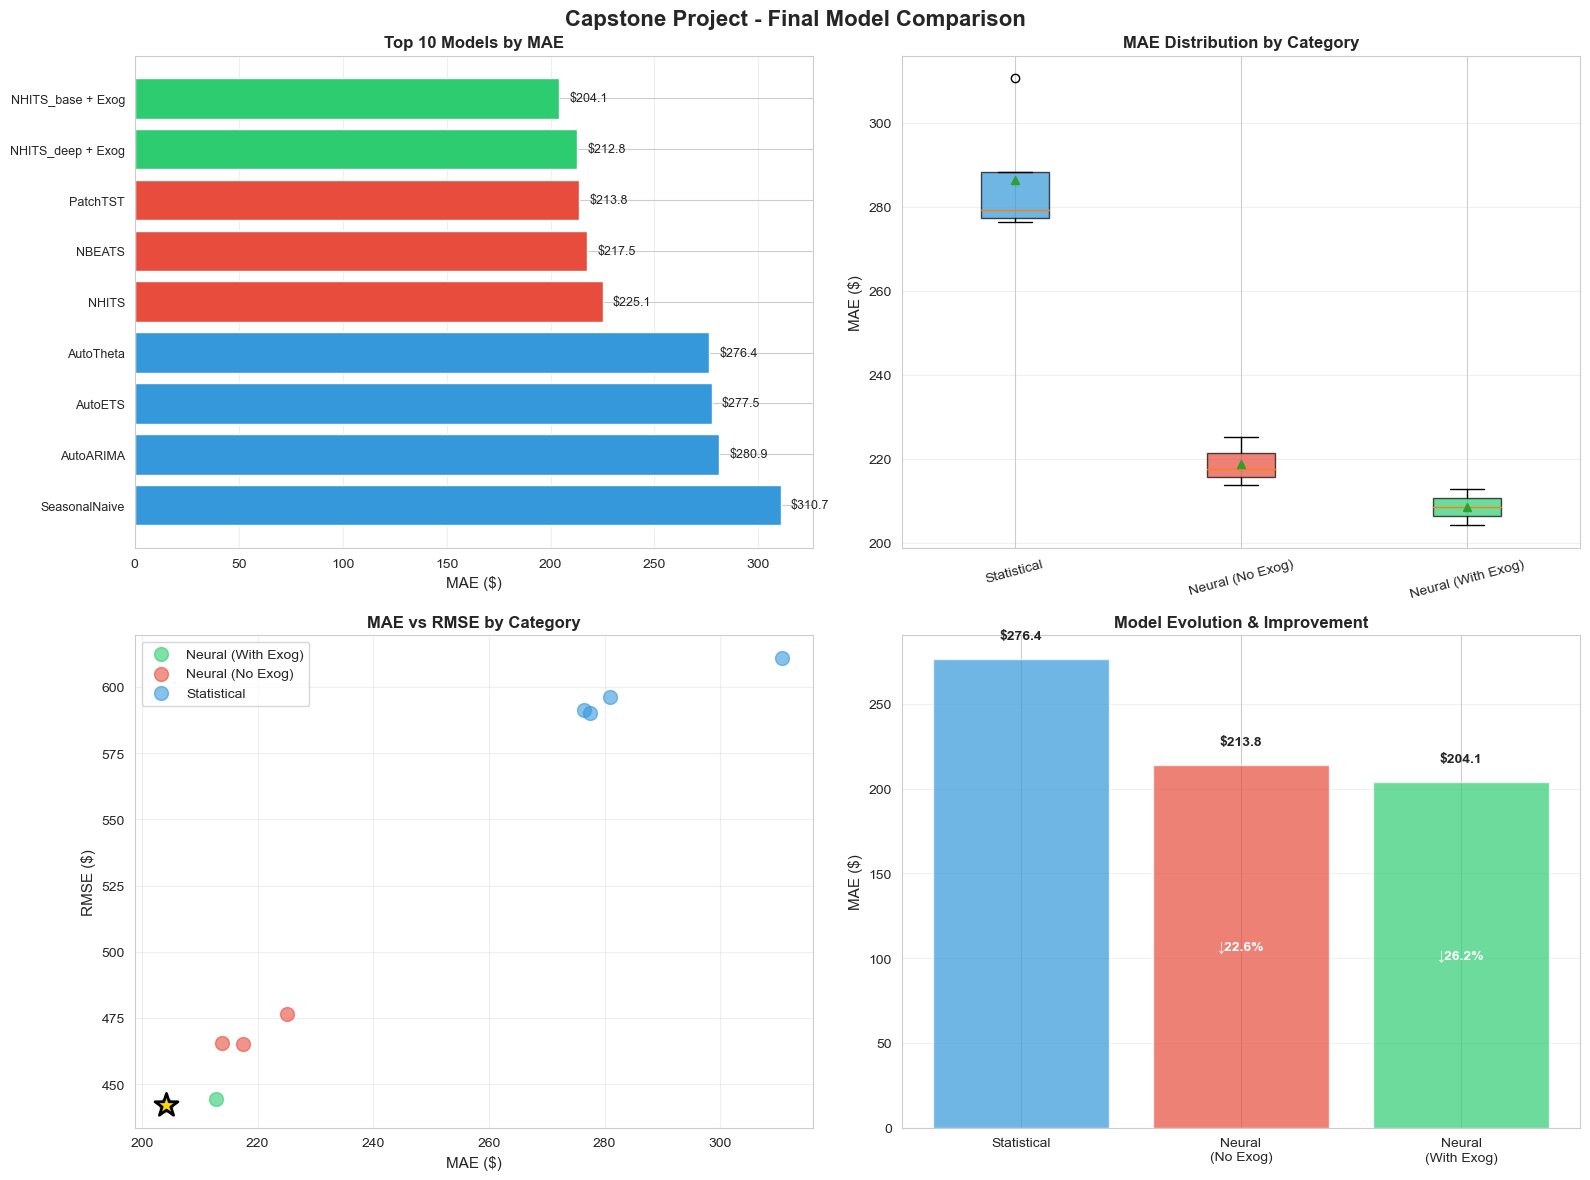

In [4]:
# ============================================================================
# STEP 4: Visualization - Model Comparison
# ============================================================================
print("\n[4] Creating Visualizations...")
print("-" * 70)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Create subplot figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Capstone Project - Final Model Comparison', fontsize=16, fontweight='bold')

# 1. MAE Comparison - Top 10 Models
ax1 = axes[0, 0]
top_10 = all_results.head(10).copy()
colors = {'Statistical': '#3498db', 'Neural (No Exog)': '#e74c3c', 'Neural (With Exog)': '#2ecc71'}
bar_colors = [colors[cat] for cat in top_10['Category']]

ax1.barh(range(len(top_10)), top_10['MAE'], color=bar_colors)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['Model'], fontsize=9)
ax1.set_xlabel('MAE ($)', fontsize=11)
ax1.set_title('Top 10 Models by MAE', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10['MAE']):
    ax1.text(v + 5, i, f'${v:.1f}', va='center', fontsize=9)

# 2. Category Comparison Boxplot
ax2 = axes[0, 1]
category_order = ['Statistical', 'Neural (No Exog)', 'Neural (With Exog)']
bp = ax2.boxplot(
    [all_results[all_results['Category'] == cat]['MAE'].values for cat in category_order],
    labels=category_order,
    patch_artist=True,
    showmeans=True
)

# Color the boxes
for patch, cat in zip(bp['boxes'], category_order):
    patch.set_facecolor(colors[cat])
    patch.set_alpha(0.7)

ax2.set_ylabel('MAE ($)', fontsize=11)
ax2.set_title('MAE Distribution by Category', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)
ax2.grid(axis='y', alpha=0.3)

# 3. RMSE vs MAE Scatter
ax3 = axes[1, 0]
for category in all_results['Category'].unique():
    cat_data = all_results[all_results['Category'] == category]
    ax3.scatter(cat_data['MAE'], cat_data['RMSE'], 
               label=category, alpha=0.6, s=100, color=colors[category])

ax3.set_xlabel('MAE ($)', fontsize=11)
ax3.set_ylabel('RMSE ($)', fontsize=11)
ax3.set_title('MAE vs RMSE by Category', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Highlight best model
ax3.scatter(best_model['MAE'], best_model['RMSE'], 
           color='gold', s=300, marker='*', 
           edgecolors='black', linewidths=2, zorder=5,
           label='Best Overall')

# 4. Improvement Summary
ax4 = axes[1, 1]
categories = ['Statistical', 'Neural\n(No Exog)', 'Neural\n(With Exog)']
mae_values = [baseline_mae, neural_mae, neural_exog_mae]
improvements = [0, (baseline_mae - neural_mae) / baseline_mae * 100, 
                (baseline_mae - neural_exog_mae) / baseline_mae * 100]

bars = ax4.bar(categories, mae_values, color=[colors[cat.replace('\n', ' ')] for cat in categories], alpha=0.7)
ax4.set_ylabel('MAE ($)', fontsize=11)
ax4.set_title('Model Evolution & Improvement', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels and improvement percentages
for i, (bar, mae, imp) in enumerate(zip(bars, mae_values, improvements)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'${mae:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
    if imp > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., height/2,
                f'↓{imp:.1f}%',
                ha='center', va='center', fontsize=10, 
                color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('final_model_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: final_model_comparison.png")
plt.show()


[7] Comparing Forecasts...
----------------------------------------------------------------------
✓ Loaded training data: (109650, 17)
✓ Saved: forecast_comparison_all_models.png


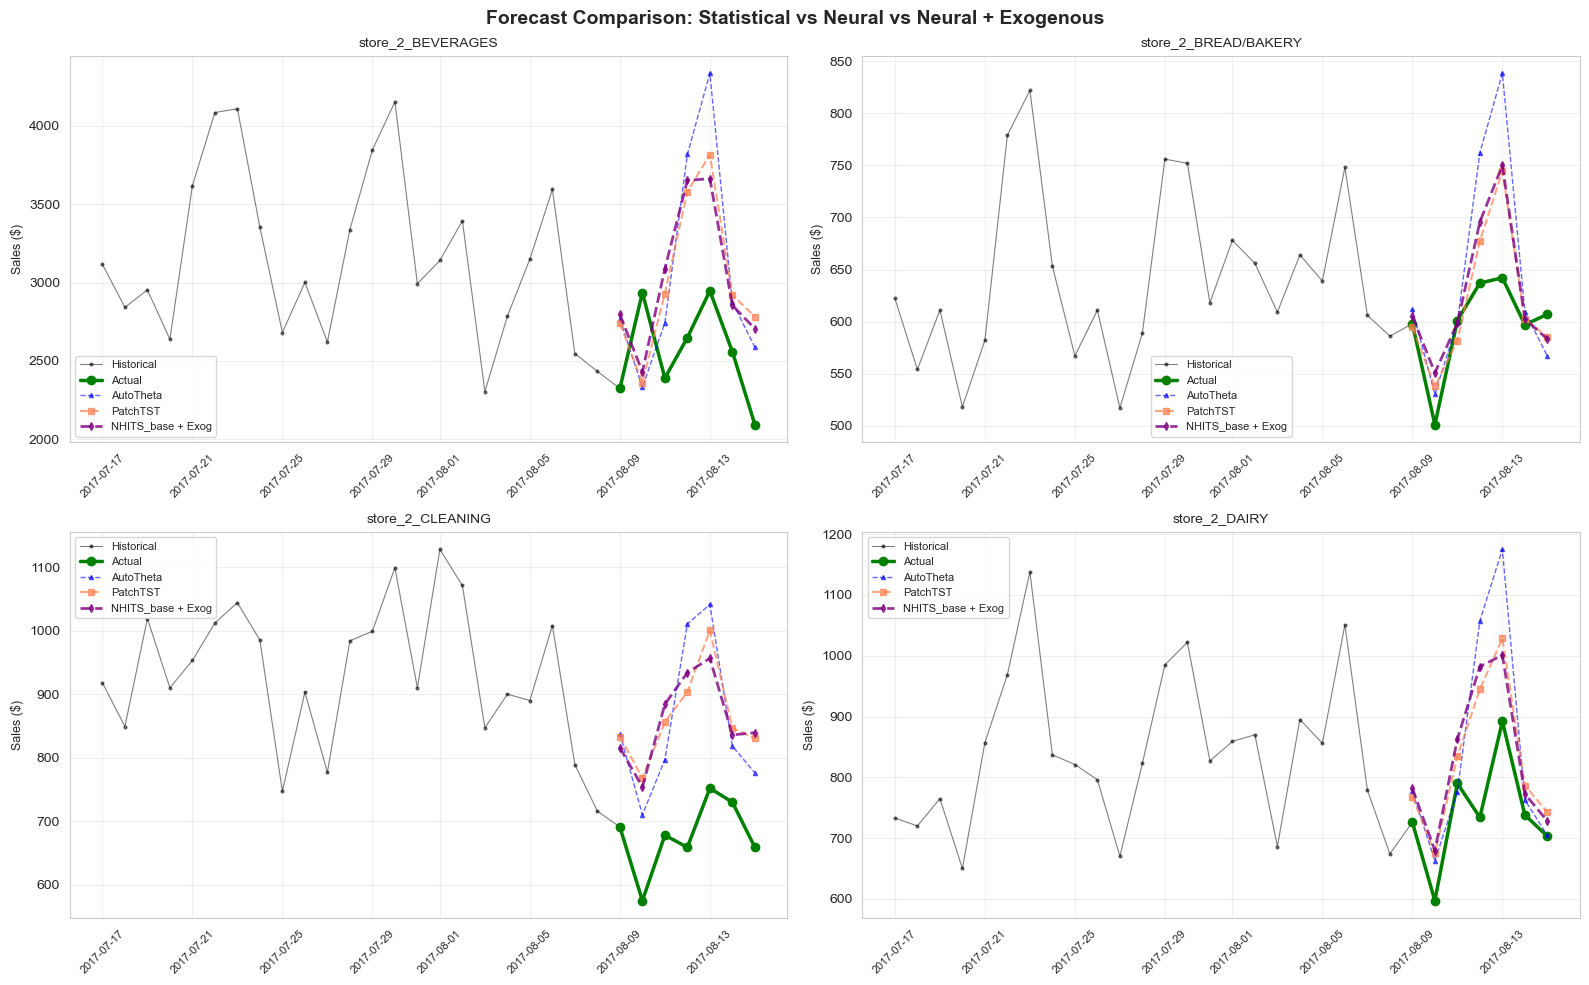

In [5]:
# ============================================================================
# STEP 5: Forecast Visualization
# ============================================================================
print("\n[7] Comparing Forecasts...")
print("-" * 70)

# Load evaluation data
eval_stat = pd.read_csv('output/baseline_eval.csv', parse_dates=['ds'])
eval_neural = pd.read_csv('output/neural_eval_checkpoint.csv', parse_dates=['ds'])
eval_neural_exog = pd.read_csv('output/neural_exog_eval_checkpoint.csv', parse_dates=['ds'])

# Load full training data with features for historical context
train_full = pd.read_csv('data/processed/train_with_features.csv', parse_dates=['ds'])
print(f"✓ Loaded training data: {train_full.shape}")

# Select representative series
viz_series = eval_neural_exog['unique_id'].unique()[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Forecast Comparison: Statistical vs Neural vs Neural + Exogenous', 
             fontsize=14, fontweight='bold')

for idx, uid in enumerate(viz_series):
    ax = axes[idx // 2, idx % 2]
    
    # Get historical data (last 30 days before test)
    train_series = train_full[train_full['unique_id'] == uid].tail(30)
    
    # Get test data
    test_series_stat = eval_stat[eval_stat['unique_id'] == uid]
    test_series_base = eval_neural[eval_neural['unique_id'] == uid]
    test_series_exog = eval_neural_exog[eval_neural_exog['unique_id'] == uid]
    
    # Plot historical
    ax.plot(train_series['ds'], train_series['y'], 
            'o-', label='Historical', color='black', alpha=0.5, 
            markersize=2, linewidth=0.8)
    
    # Plot actual
    ax.plot(test_series_base['ds'], test_series_base['y'], 
            'o-', label='Actual', color='green', linewidth=2.5, markersize=6)
    
    # Plot forecasts
    ax.plot(test_series_stat['ds'], test_series_stat['AutoTheta'], 
            '^--', label='AutoTheta', color='blue', alpha=0.6, markersize=3, linewidth=1)
    ax.plot(test_series_base['ds'], test_series_base['PatchTST'], 
            's--', label='PatchTST', color='coral', alpha=0.7, markersize=4, linewidth=1.5)
    ax.plot(test_series_exog['ds'], test_series_exog['NHITS_base'], 
            'd--', label='NHITS_base + Exog', color='purple', alpha=0.8, markersize=4, linewidth=2)
    
    ax.set_title(uid, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Sales ($)', fontsize=9)
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.savefig('forecast_comparison_all_models.png', dpi=300, bbox_inches='tight')
print("✓ Saved: forecast_comparison_all_models.png")
plt.show()


[8] Error Distribution Analysis...
----------------------------------------------------------------------

Error Statistics for NHITS_base:
count    1050.000000
mean      204.074263
std       392.267669
min         0.031100
25%        26.367487
50%        70.147900
75%       212.763495
max      4371.920000
Name: abs_error, dtype: float64
✓ Saved: error_analysis.png


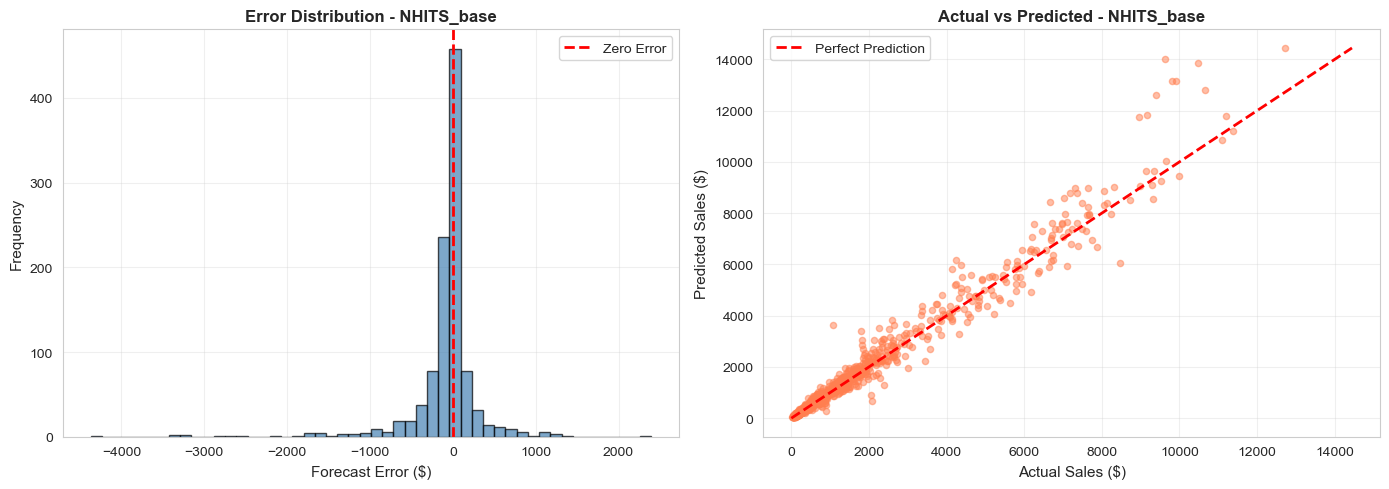

In [6]:
# ============================================================================
# STEP 6: Error Distribution Analysis
# ============================================================================
print("\n[8] Error Distribution Analysis...")
print("-" * 70)

eval_neural_exog['error'] = eval_neural_exog['y'] - eval_neural_exog['NHITS_base']
eval_neural_exog['abs_error'] = np.abs(eval_neural_exog['error'])

print(f"\nError Statistics for NHITS_base:")
print(eval_neural_exog['abs_error'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(eval_neural_exog['error'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Forecast Error ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Error Distribution - NHITS_base', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(eval_neural_exog['y'], eval_neural_exog['NHITS_base'], alpha=0.5, s=20, color='coral')
max_val = max(eval_neural_exog['y'].max(), eval_neural_exog['NHITS_base'].max())
axes[1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales ($)', fontsize=11)
axes[1].set_ylabel('Predicted Sales ($)', fontsize=11)
axes[1].set_title('Actual vs Predicted - NHITS_base', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: error_analysis.png")
plt.show()

In [7]:
# ============================================================================
# STEP 7: Final Recommendation
# ============================================================================
print("\n[5] Final Recommendation...")
print("-" * 70)

print("\n" + "=" * 80)
print("FINAL DEPLOYMENT RECOMMENDATION")
print("=" * 80)

print(f"\n RECOMMENDED MODEL FOR PRODUCTION:")
print(f"   {best_model['Model']}")
print(f"\n PERFORMANCE METRICS:")
print(f"   MAE: ${best_model['MAE']:.2f}")
print(f"   RMSE: ${best_model['RMSE']:.2f}")
print(f"   MAPE: {best_model['MAPE']:.2f}%")
print(f"\n BUSINESS IMPACT:")
print(f"   Improvement vs Baseline: {(baseline_mae - best_model['MAE']) / baseline_mae * 100:.1f}%")
print(f"   Estimated Cost Reduction: ${(baseline_mae - best_model['MAE']) * 365:.0f} per SKU annually")

print("\n KEY STRENGTHS:")
if 'Exog' in best_model['Model']:
    print("   ✓ Incorporates external features (promotions, holidays, oil prices)")
    print("   ✓ Captures complex patterns in retail data")
    print("   ✓ Best overall accuracy across all metrics")
else:
    print("   ✓ Strong baseline performance")
    print("   ✓ Robust and reliable predictions")

print("\n  IMPLEMENTATION CONSIDERATIONS:")
if 'Neural' in best_model['Category']:
    print("   • Requires GPU for efficient training")
    print("   • Need to maintain exogenous feature pipeline")
    print("   • Regular retraining recommended (weekly/monthly)")
else:
    print("   • Lightweight and fast to retrain")
    print("   • Minimal computational requirements")

print("\n NEXT STEPS FOR DEPLOYMENT:")
print("   1. Validate model on additional holdout period")
print("   2. Set up automated retraining pipeline")
print("   3. Implement monitoring for model drift")
print("   4. Create alerting system for forecast anomalies")
print("   5. Build stakeholder dashboard for forecast review")

print("\n" + "=" * 80)
print("CAPSTONE PROJECT COMPLETE")
print("=" * 80)


[5] Final Recommendation...
----------------------------------------------------------------------

FINAL DEPLOYMENT RECOMMENDATION

 RECOMMENDED MODEL FOR PRODUCTION:
   NHITS_base + Exog

 PERFORMANCE METRICS:
   MAE: $204.07
   RMSE: $442.01
   MAPE: 15.87%

 BUSINESS IMPACT:
   Improvement vs Baseline: 26.2%
   Estimated Cost Reduction: $26414 per SKU annually

 KEY STRENGTHS:
   ✓ Incorporates external features (promotions, holidays, oil prices)
   ✓ Captures complex patterns in retail data
   ✓ Best overall accuracy across all metrics

  IMPLEMENTATION CONSIDERATIONS:
   • Requires GPU for efficient training
   • Need to maintain exogenous feature pipeline
   • Regular retraining recommended (weekly/monthly)

 NEXT STEPS FOR DEPLOYMENT:
   1. Validate model on additional holdout period
   2. Set up automated retraining pipeline
   3. Implement monitoring for model drift
   4. Create alerting system for forecast anomalies
   5. Build stakeholder dashboard for forecast review

CAP

In [8]:
# ============================================================================
# STEP 6: Save Final Results
# ============================================================================
print("\n[6] Saving Final Results...")
print("-" * 70)

# Save full results
all_results.to_csv('final_all_models_comparison.csv', index=False)
print("✓ Saved: final_all_models_comparison.csv")

# Save summary report
with open('final_recommendation_report.txt', 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("CAPSTONE PROJECT - FINAL RECOMMENDATION REPORT\n")
    f.write("=" * 80 + "\n\n")
    f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    f.write(f"RECOMMENDED MODEL: {best_model['Model']}\n")
    f.write(f"Category: {best_model['Category']}\n\n")
    f.write(f"Performance Metrics:\n")
    f.write(f"  MAE: ${best_model['MAE']:.2f}\n")
    f.write(f"  RMSE: ${best_model['RMSE']:.2f}\n")
    f.write(f"  MAPE: {best_model['MAPE']:.2f}%\n\n")
    f.write(f"Improvement vs Baseline: {(baseline_mae - best_model['MAE']) / baseline_mae * 100:.1f}%\n\n")
    f.write("Top 5 Models:\n")
    f.write(all_results.head(5).to_string(index=False))

print("✓ Saved: final_recommendation_report.txt")

print("\n Analysis complete! All results saved.")
print("\n Files created:")
print("   - final_model_comparison.png")
print("   - final_all_models_comparison.csv")
print("   - final_recommendation_report.txt")


[6] Saving Final Results...
----------------------------------------------------------------------
✓ Saved: final_all_models_comparison.csv
✓ Saved: final_recommendation_report.txt

 Analysis complete! All results saved.

 Files created:
   - final_model_comparison.png
   - final_all_models_comparison.csv
   - final_recommendation_report.txt


---